In [1]:
import sys
sys.path.insert(0, "../")

In [2]:
from collections import Counter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [3]:
from universe.dataset import create_dataset_from_files

In [4]:
SPLITS = ["train", "dev", "test"]

In [5]:
dataset = {
    x: create_dataset_from_files(x, "../data") for x in SPLITS
}
train, dev, test = dataset["train"], dataset["dev"], dataset["test"]

In [6]:
for split in SPLITS:
    dataset[split]["sequence_length"] = dataset[split]["sequence"].str.len()

In [7]:
for split in SPLITS:
    # print
    print(f"Partition: {split}: \n")
    print(f"Num Sequences: {len(dataset[split])} sequences")
    print(f"Num Families: {dataset[split]['family_accession'].nunique()}")
    print(f"Most common Families:\n{dataset[split]['family_accession'].value_counts().head(10)}")
    print("\n")

Partition: train: 

Num Sequences: 1086741 sequences
Num Families: 17929
Most common Families:
PF13649.6     3637
PF00560.33    1927
PF13508.7     1761
PF06580.13    1537
PF02397.16    1528
PF00677.17    1504
PF01035.20    1345
PF02417.15    1265
PF13472.6     1252
PF00684.19    1210
Name: family_accession, dtype: int64


Partition: dev: 

Num Sequences: 126171 sequences
Num Families: 13071
Most common Families:
PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
PF00677.17    187
PF01035.20    168
PF02417.15    157
PF13472.6     156
PF00684.19    151
Name: family_accession, dtype: int64


Partition: test: 

Num Sequences: 126171 sequences
Num Families: 13071
Most common Families:
PF13649.6     454
PF00560.33    240
PF13508.7     219
PF06580.13    192
PF02397.16    190
PF00677.17    187
PF01035.20    168
PF02417.15    157
PF13472.6     156
PF00684.19    151
Name: family_accession, dtype: int64




In [8]:
dataset["train"].head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence,sequence_length
0,Penicillinase_R,Q81U16_BACAN/8-123,PF03965.16,ISEAELEIMKVLWLKSP.QTANEIIEE.LEDP.MDW..KPKTIRTL...,ISEAELEIMKVLWLKSPQTANEIIEELEDPMDWKPKTIRTLINRLV...,116
1,Rtt106,POB3_CANAL/362-454,PF08512.12,AGVPCSVKA...SEGYLFPL......DRCFLF.VTKPTLYIPYSE....,AGVPCSVKASEGYLFPLDRCFLFVTKPTLYIPYSEISSVVMSRTGG...,93
2,F-actin_cap_A,Q8I3I2_PLAF7/12-301,PF01267.17,IRHVLMNSPPGKLYDLVK..DINILL.G.........SSVSIQ.KI...,IRHVLMNSPPGKLYDLVKDINILLGSSVSIQKILEEVLKDYNEKNY...,290
3,HupF_HypC,O28902_ARCFU/1-65,PF01455.18,MCIAIPGR...I.ER..IDY...............P....IAIVDF...,MCIAIPGRIERIDYPIAIVDFKGLKKEVRIDLLENPQIGDYVLVHV...,65
4,DUF3794,R6BY75_9CLOT/189-271,PF12673.7,NIFHI..LWEDVDL..E.GVTFKPMG...E...........S.......,NIFHILWEDVDLEGVTFKPMGESISVQGDIHIFVLYEGEGENTPIR...,83


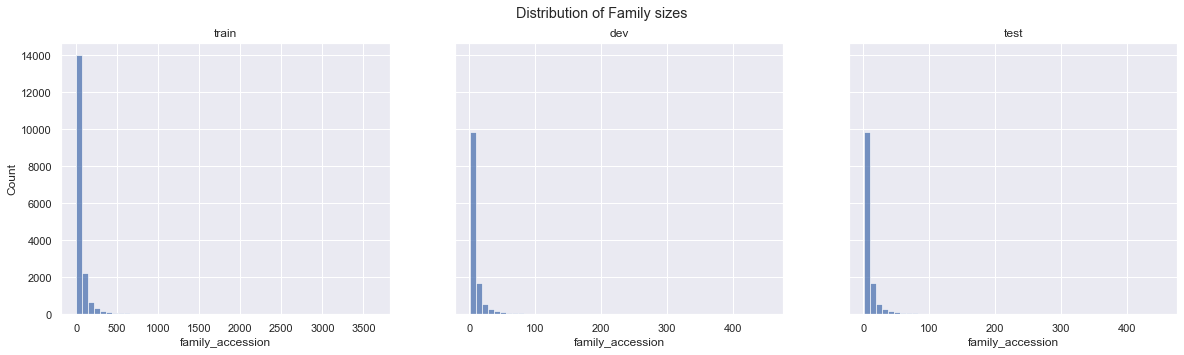

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle("Distribution of Family sizes")
for i, split in enumerate(SPLITS):
    sns.histplot(dataset[split]["family_accession"].value_counts(), ax=ax[i], bins=50)
    ax[i].set_title(split)
plt.show()

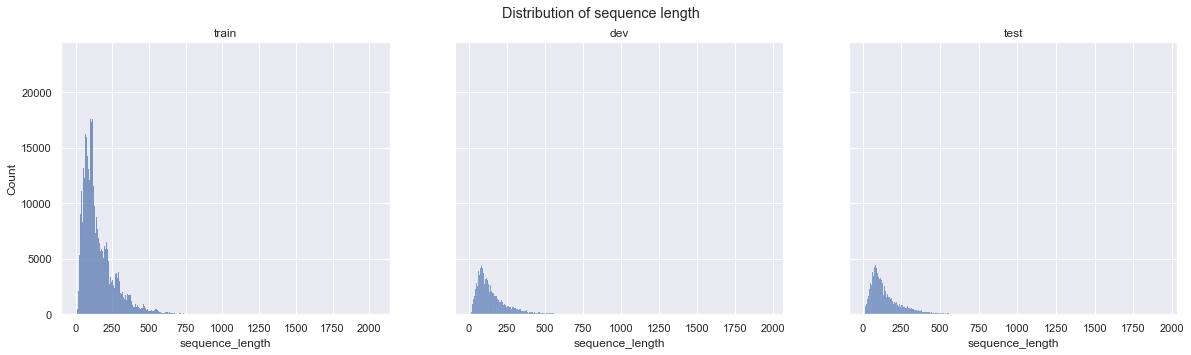

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle("Distribution of sequence length")
for i, split in enumerate(SPLITS):
    sns.histplot(dataset[split]["sequence_length"], ax=ax[i])
    ax[i].set_title(split)
plt.show()

In [11]:
amino_count = {}
for split in SPLITS:
    dataset[split]["amino_count"] = dataset[split].sequence.apply(lambda x: Counter(x))
    count = sum(dataset[split]["amino_count"].tolist(), Counter())
    df = pd.DataFrame({"Amino_Acid": list(count.keys()), "Count": list(count.values())})
    df = df.sort_values("Count", ascending=False).reset_index(drop=True)
    amino_count[split] = df


In [12]:
amino_count["train"]

,Amino_Acid,Count
0,L,17062816
1,A,14384873
2,V,11913147
3,G,11845579
4,E,10859966
5,S,10597822
6,I,10234455
7,R,9406165
8,D,9371097
9,K,9127832


In [13]:
amino_count["train"].to_dict()["Amino_Acid"]

{0: 'L',
 1: 'A',
 2: 'V',
 3: 'G',
 4: 'E',
 5: 'S',
 6: 'I',
 7: 'R',
 8: 'D',
 9: 'K',
 10: 'T',
 11: 'P',
 12: 'F',
 13: 'N',
 14: 'Q',
 15: 'Y',
 16: 'M',
 17: 'H',
 18: 'C',
 19: 'W',
 20: 'X',
 21: 'U',
 22: 'B',
 23: 'O',
 24: 'Z'}

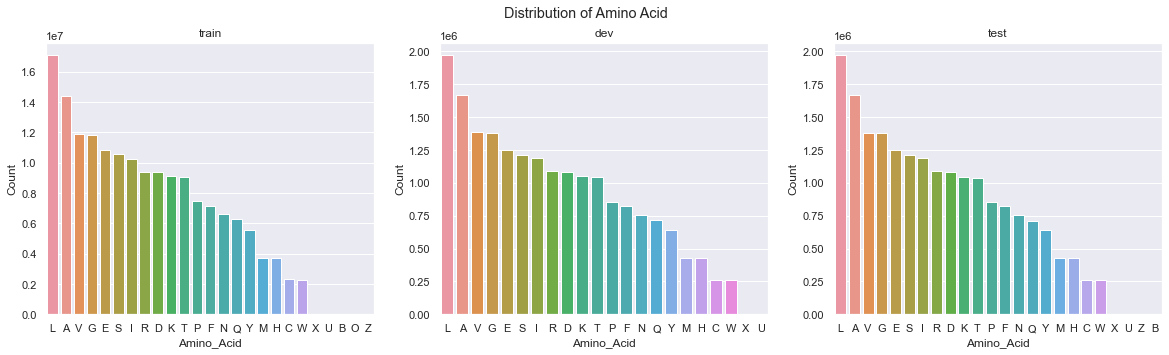

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5)) # , sharey=True
fig.suptitle("Distribution of Amino Acid")
for i, split in enumerate(SPLITS):
    sns.barplot(x="Amino_Acid", y="Count", data=amino_count[split], ax=ax[i])
    ax[i].set_title(split)
plt.show()

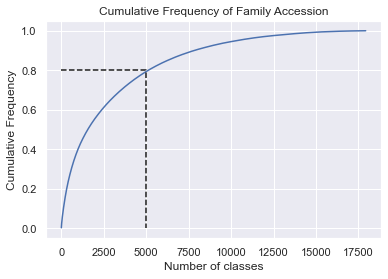

In [15]:
plt.title("Cumulative Frequency of Family Accession")
plt.plot(range(train.family_accession.nunique()), (train.family_accession.value_counts().cumsum() / len(train)).values)
plt.plot((0, 5000, 5000, 5000), (0.8, 0.8, 0.8, 0.0), "--", color="k")
plt.xlabel("Number of classes")
plt.ylabel("Cumulative Frequency")
plt.show()

In [16]:
NO_FAMILIES_RETAINED = 500

In [17]:
families = train["family_accession"].value_counts()[:NO_FAMILIES_RETAINED].index.tolist()

In [18]:
new_train = train.query("family_accession in @families").reset_index()
new_test = test.query("family_accession in @families").reset_index()
new_dev = dev.query("family_accession in @families").reset_index()

In [19]:
print("New data sizes:\n")
print(f"Train: {len(new_train)}")
print(f"Dev: {len(new_dev)}")
print(f"Test: {len(new_test)}")

New data sizes:

Train: 294809
Dev: 36571
Test: 36571


In [22]:
!mkdir -p ../data/processed/$NO_FAMILIES_RETAINED

In [23]:
new_train.to_csv(f"../data/processed/{NO_FAMILIES_RETAINED}/train.csv", index=False)
new_dev.to_csv(f"../data/processed/{NO_FAMILIES_RETAINED}/dev.csv", index=False)
new_test.to_csv(f"../data/processed/{NO_FAMILIES_RETAINED}/test.csv", index=False)